# CNN with tensorflow

## Instalar dependencias y librerias

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.7.0'

## Pre procesado de datos

In [2]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

# Cargar el dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 47s 0us/step


In [3]:
# Normalizacion de las imagenes

X_train = X_train / 255
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test = X_test / 255

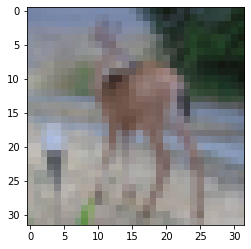

In [5]:
plt.imshow(X_test[100])

In [6]:
y_test[10]

array([0], dtype=uint8)

In [7]:
len(class_names)

10

## Construir una red neuronal convolucional

In [8]:
model = tf.keras.models.Sequential()

# Red convolucional
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Flatten())

# Capa fully connected
model.add(tf.keras.layers.Dense(units=128, activation='relu'))


#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense( units = 10, activation = 'softmax'))




In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

## Compilar modelo

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['sparse_categorical_accuracy']) # batch_size = 1

## Entrenar el modelo

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 255s 163ms/step - loss: 0.8683 - sparse_categorical_accuracy: 0.6957
Epoch 2/10
1563/1563 [==============================] - 255s 163ms/step - loss: 0.7150 - sparse_categorical_accuracy: 0.7496
Epoch 3/10
1563/1563 [==============================] - 257s 164ms/step - loss: 0.5947 - sparse_categorical_accuracy: 0.7906
Epoch 4/10
1563/1563 [==============================] - 256s 164ms/step - loss: 0.4949 - sparse_categorical_accuracy: 0.8265
Epoch 5/10
1563/1563 [==============================] - 258s 165ms/step - loss: 0.3952 - sparse_categorical_accuracy: 0.8608
Epoch 6/10
1563/1563 [==============================] - 258s 165ms/step - loss: 0.3217 - sparse_categorical_accuracy: 0.8862
Epoch 7/10
1563/1563 [==============================] - 260s 166ms/step - loss: 0.2581 - sparse_categorical_accuracy: 0.9078
Epoch 8/10
1563/1563 [==============================] - 261s 167ms/step - loss: 0.2130 - sparse_categorical_accuracy: 0.9235


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


313/313 [==============================] - 13s 41ms/step - loss: 1.4204 - sparse_categorical_accuracy: 0.7169


In [14]:
print("Test accuracy: {}". format(test_accuracy))

Test accuracy: 0.7168999910354614


In [38]:
y_pred = model.predict(X_test)
y_pred = y_pred.tolist()


In [39]:
for i in range( len(y_pred) ):
  y_pred[i] = y_pred[i].index( np.max(y_pred[i]) )

for i in range( len( y_test)):
  y_test[i] = y_test[i][0]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

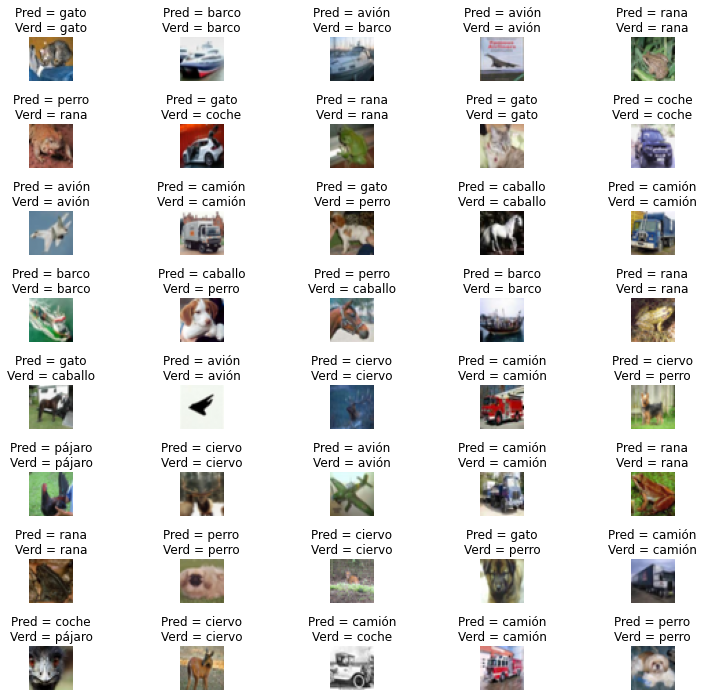

In [43]:
L = 8
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Pred = {}\nVerd = {}'.format(class_names[y_pred[i]], class_names[y_test[i]] ) )
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2, hspace = 1)